# PIAIC142446NaumanBashir

Credit Card Fraud Detection::

Download dataset from this link:

https://www.kaggle.com/mlg-ulb/creditcardfraud

# Description about dataset::

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 


### Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# WORKFLOW :

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Standardized the Input Variables. 

4.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

6.Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

7.Train the Model with Epochs (100).

8.If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

9.Prediction should be > 92%
10.Evaluation Step
11Prediction


# Task::

## Identify fraudulent credit card transactions.

In [1]:
cd C:\Users\nauma\Desktop\PIAIC_DL\PIAIC_Assignment_DL\

C:\Users\nauma\Desktop\PIAIC_DL\PIAIC_Assignment_DL


In [6]:
# import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
data = pd.read_csv('creditcard.csv')

In [9]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
data.shape

(284807, 31)

In [11]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [13]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [14]:
non_fraud = data[data['Class'] == 0]
fraud = data[data['Class'] == 1]

In [15]:
non_fraud.shape, fraud.shape

((284315, 31), (492, 31))

In [17]:
non_fraud = non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

**Merge fraud and non_fraud datasets**

In [18]:
final_data = fraud.append(non_fraud, ignore_index=True)
final_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [19]:
final_data['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [20]:
X = final_data.drop('Class', axis=1)
y = final_data['Class']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [22]:
X_train.shape, X_test.shape

((688, 30), (296, 30))

In [23]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
633,82644.0,-2.424979,1.879610,0.118779,-1.694876,-0.721057,-0.349701,-0.341409,1.040600,1.048631,...,0.457822,-0.237272,-0.327530,0.169846,-0.331942,-0.012874,0.769647,0.427084,0.050303,3.07
662,167143.0,2.075331,-0.379364,-2.613121,0.395113,0.689749,-0.771710,0.637074,-0.442253,-1.488096,...,-0.570615,-0.011997,0.435222,-0.295213,-0.802587,0.781623,-0.168468,-0.045675,-0.080806,74.00
510,46260.0,1.276246,0.073218,0.157897,0.324545,-0.150865,-0.230579,-0.160269,0.078736,0.066164,...,-0.152044,-0.277651,-0.904890,0.040404,-0.542788,0.247931,0.133455,-0.043461,-0.002877,0.89
68,26961.0,-23.237920,13.487386,-25.188773,6.261733,-17.345188,-4.534989,-17.100492,15.374630,-3.845567,...,1.630787,1.769708,-1.691973,-1.045673,0.143386,1.611577,-0.221576,1.481233,0.438125,99.99
294,93823.0,-3.821939,5.667247,-9.244963,8.246147,-4.368286,-3.450735,-8.427378,2.305609,-5.338079,...,1.115247,1.990520,0.083353,-0.062264,0.390188,0.329884,0.098017,1.869570,1.000850,75.86


**Scale the data**

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
# We will not only transform the X_test because it avoids overfitting 
# This means we are transforming X_test based on the findings of X_train
X_test = scaler.transform(X_test) 

In [25]:
# Convert y_train and y_test to numpy arrays
y_train = y_train.to_numpy()

In [26]:
y_test = y_test.to_numpy()

In [27]:
X_train.shape

(688, 30)

In [28]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [29]:
X_train.shape, X_test.shape

((688, 30, 1), (296, 30, 1))

**Build CNN Model**

In [30]:
epochs = 20
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2)) # dropout 20% of neurons

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten()) # Flatten our 3D data into a vector
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0

In [32]:
model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [33]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
22/22 [==============================] - 98s 1s/step - loss: 1.2783 - accuracy: 0.6138 - val_loss: 0.6480 - val_accuracy: 0.7601
Epoch 2/20
22/22 [==============================] - 0s 15ms/step - loss: 0.8942 - accuracy: 0.6751 - val_loss: 0.6037 - val_accuracy: 0.8041
Epoch 3/20
22/22 [==============================] - 0s 16ms/step - loss: 0.6537 - accuracy: 0.7794 - val_loss: 0.5751 - val_accuracy: 0.8547
Epoch 4/20
22/22 [==============================] - 0s 15ms/step - loss: 0.5666 - accuracy: 0.8252 - val_loss: 0.5493 - val_accuracy: 0.8851
Epoch 5/20
22/22 [==============================] - 0s 13ms/step - loss: 0.4413 - accuracy: 0.8443 - val_loss: 0.5221 - val_accuracy: 0.8953
Epoch 6/20
22/22 [==============================] - 0s 13ms/step - loss: 0.3888 - accuracy: 0.8625 - val_loss: 0.4961 - val_accuracy: 0.9088
Epoch 7/20
22/22 [==============================] - 0s 15ms/step - loss: 0.3298 - accuracy: 0.8820 - val_loss: 0.4720 - val_accuracy: 0.9020
Epoch 8/20
22/

In [34]:
def plot_learningCurve(history, epoch):
  # plot training  validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train', 'Val'], loc = 'upper left')
  plt.show()

  # plot training & valiation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train', 'Val'], loc = 'upper left')
  plt.show()

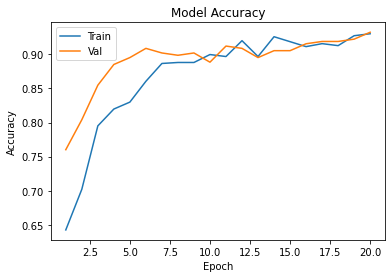

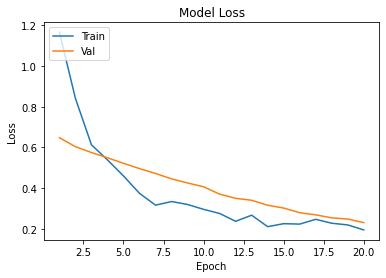

In [35]:
plot_learningCurve(history, epochs)

**Adding MaxPool**

In [85]:
epochs = 100
model = Sequential()
model.add(Conv1D(10, 2, activation='relu', input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2)) # dropout 20% of neurons

model.add(Conv1D(8, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten()) # Flatten our 3D data into a vector
model.add(Dense(6, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

Epoch 1/100
22/22 [==============================] - 1s 16ms/step - loss: 1.3924 - accuracy: 0.3988 - val_loss: 0.7612 - val_accuracy: 0.3716
Epoch 2/100
22/22 [==============================] - 0s 6ms/step - loss: 1.3413 - accuracy: 0.4141 - val_loss: 0.7426 - val_accuracy: 0.3851
Epoch 3/100
22/22 [==============================] - 0s 6ms/step - loss: 1.4764 - accuracy: 0.4412 - val_loss: 0.7308 - val_accuracy: 0.3716
Epoch 4/100
22/22 [==============================] - 0s 6ms/step - loss: 1.4142 - accuracy: 0.4452 - val_loss: 0.7269 - val_accuracy: 0.3953
Epoch 5/100
22/22 [==============================] - 0s 6ms/step - loss: 1.4711 - accuracy: 0.4499 - val_loss: 0.7268 - val_accuracy: 0.4020
Epoch 6/100
22/22 [==============================] - 0s 6ms/step - loss: 1.1771 - accuracy: 0.4890 - val_loss: 0.7296 - val_accuracy: 0.4223
Epoch 7/100
22/22 [==============================] - 0s 6ms/step - loss: 1.3837 - accuracy: 0.4005 - val_loss: 0.7327 - val_accuracy: 0.4291
Epoch 8/100


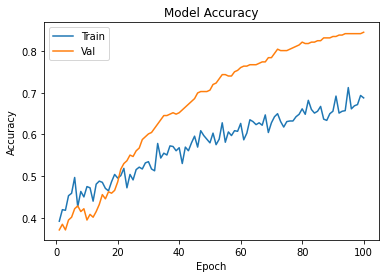

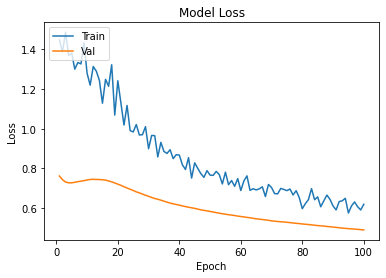

In [86]:
model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)
plot_learningCurve(history, epochs)

In [36]:
epochs = 50
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2)) # dropout 20% of neurons

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten()) # Flatten our 3D data into a vector
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

Epoch 1/50
22/22 [==============================] - 3s 33ms/step - loss: 1.1292 - accuracy: 0.5356 - val_loss: 0.6391 - val_accuracy: 0.5912
Epoch 2/50
22/22 [==============================] - 0s 15ms/step - loss: 0.8347 - accuracy: 0.5991 - val_loss: 0.6339 - val_accuracy: 0.5676
Epoch 3/50
22/22 [==============================] - 0s 15ms/step - loss: 0.6319 - accuracy: 0.6839 - val_loss: 0.6252 - val_accuracy: 0.5473
Epoch 4/50
22/22 [==============================] - 0s 15ms/step - loss: 0.6323 - accuracy: 0.6936 - val_loss: 0.6075 - val_accuracy: 0.5743
Epoch 5/50
22/22 [==============================] - 0s 15ms/step - loss: 0.5615 - accuracy: 0.7756 - val_loss: 0.5836 - val_accuracy: 0.6216
Epoch 6/50
22/22 [==============================] - 0s 16ms/step - loss: 0.4563 - accuracy: 0.7834 - val_loss: 0.5563 - val_accuracy: 0.6993
Epoch 7/50
22/22 [==============================] - 0s 15ms/step - loss: 0.4655 - accuracy: 0.7919 - val_loss: 0.5258 - val_accuracy: 0.7905
Epoch 8/50
22

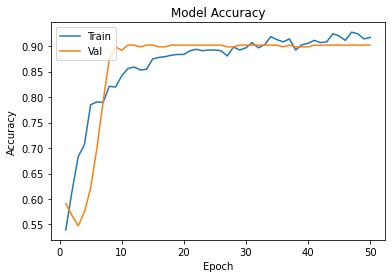

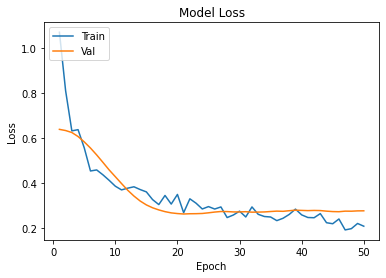

In [37]:
model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)
plot_learningCurve(history, epochs)

Epoch 1/50
22/22 [==============================] - 2s 32ms/step - loss: 0.2271 - accuracy: 0.9113 - val_loss: 0.2759 - val_accuracy: 0.9020
Epoch 2/50
22/22 [==============================] - 0s 16ms/step - loss: 0.2435 - accuracy: 0.9051 - val_loss: 0.2725 - val_accuracy: 0.9020
Epoch 3/50
22/22 [==============================] - 0s 16ms/step - loss: 0.1900 - accuracy: 0.9294 - val_loss: 0.2703 - val_accuracy: 0.9054
Epoch 4/50
22/22 [==============================] - 0s 15ms/step - loss: 0.2320 - accuracy: 0.9119 - val_loss: 0.2724 - val_accuracy: 0.9054
Epoch 5/50
22/22 [==============================] - 0s 19ms/step - loss: 0.2008 - accuracy: 0.9178 - val_loss: 0.2678 - val_accuracy: 0.9054
Epoch 6/50
22/22 [==============================] - 0s 19ms/step - loss: 0.1819 - accuracy: 0.9378 - val_loss: 0.2664 - val_accuracy: 0.9054
Epoch 7/50
22/22 [==============================] - 0s 16ms/step - loss: 0.2153 - accuracy: 0.9185 - val_loss: 0.2664 - val_accuracy: 0.9054
Epoch 8/50
22

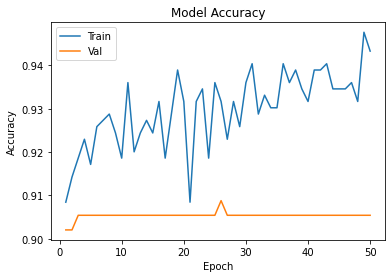

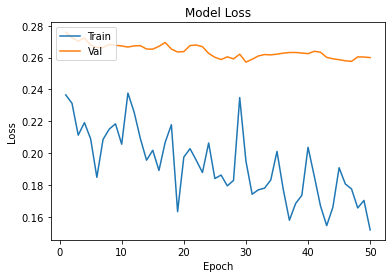

In [38]:
model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)
plot_learningCurve(history, epochs)

In [39]:
y_pred = model.predict(X_test)

In [40]:
testing = model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 5ms/step - loss: 0.2600 - accuracy: 0.9054


In [41]:
predictions = model.predict(X_test)
predictions = predictions.flatten()

In [42]:
predictions

array([0.02430973, 0.01607162, 0.9999864 , 0.02197848, 0.9995553 ,
       0.0124724 , 0.7442522 , 0.00876244, 0.03202101, 0.9999821 ,
       0.09882271, 0.00739786, 1.        , 0.12444232, 0.9999987 ,
       0.9922984 , 0.9999733 , 0.03702996, 0.99999213, 0.99999416,
       0.9239254 , 0.0626164 , 1.        , 0.02084331, 0.0529644 ,
       0.36098787, 0.01650554, 1.        , 0.00829941, 0.14711303,
       0.9786421 , 0.99318886, 0.04978185, 0.04251723, 0.01124911,
       0.01440006, 0.02032601, 0.9999732 , 0.01228687, 0.9999871 ,
       0.19914465, 0.9999813 , 0.01921964, 0.99997866, 1.        ,
       0.01108166, 0.2617126 , 0.00579078, 0.04811121, 0.9999763 ,
       0.9999999 , 0.9994617 , 0.9994344 , 1.        , 0.11477797,
       0.03193634, 0.05589626, 0.00596812, 0.9999974 , 0.9999838 ,
       0.99879634, 0.2900618 , 0.24653362, 0.06328075, 0.0074625 ,
       0.9999999 , 0.02891496, 0.06841823, 0.03169997, 0.9998896 ,
       0.02759734, 0.76880383, 1.        , 0.0029303 , 0.10939

In [43]:
testing = model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 6ms/step - loss: 0.2600 - accuracy: 0.9054
